In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv('DS_Sber.csv', sep=';')
data.columns = data.columns.str.lower()
data['reportdate'] = data['reportdate'].str.replace('.', '/')
data["reportdate"] = pd.to_datetime(data["reportdate"], infer_datetime_format=True)
data.head()

C:\Temp\ipykernel_9700\3124240810.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['reportdate'] = data['reportdate'].str.replace('.', '/')


,reportdate,value
0,2013-12-30,3457625638
1,2013-12-31,3417092149
2,2014-01-01,3417092149
3,2014-01-02,3417092149
4,2014-01-03,3417092149


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   reportdate  2111 non-null   datetime64[ns]
 1   value       2111 non-null   int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 33.1 KB


In [4]:
data.describe()

,value
count,2.111000e+03
mean,3.389668e+10
std,1.875474e+10
min,3.282810e+09
25%,1.824160e+10
50%,3.021352e+10
75%,4.758339e+10
max,7.822860e+10


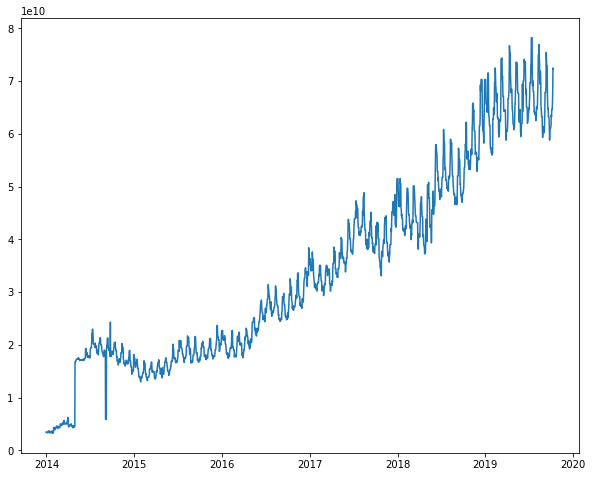

In [5]:
plt.figure(figsize=(10, 8))

plt.plot(data.reportdate, data.value)

plt.show()

In [50]:
shifted = 360

# data.drop(['predicted'], inplace=True, axis=1)
data['predict'] = data['value'].shift(-shifted)
data.head(10)

,reportdate,value,predict,predicted
0,2013-12-30,3457625638,1.476927e+10,3.509533e+09
1,2013-12-31,3417092149,1.523359e+10,3.509533e+09
2,2014-01-01,3417092149,1.523359e+10,3.509533e+09
3,2014-01-02,3417092149,1.523359e+10,3.509533e+09
4,2014-01-03,3417092149,1.506514e+10,3.509533e+09
5,2014-01-04,3417092149,1.817771e+10,3.509533e+09
6,2014-01-05,3417092149,1.745243e+10,3.413477e+09
7,2014-01-06,3320846785,1.745243e+10,3.413477e+09
8,2014-01-07,3320846785,1.745243e+10,3.722306e+09
9,2014-01-08,3630283744,1.745243e+10,3.710874e+09


In [51]:
from sklearn.linear_model import LinearRegression

x = np.array(data['value'][:-shifted]).reshape((-1, 1))
y = np.array(data['predict'][:-shifted])

In [52]:
model = LinearRegression()

In [53]:
model.fit(x, y)

LinearRegression()

In [54]:
model.score(x, y)

0.8895860381956777

In [55]:
model.intercept_

3982770049.9091644

In [56]:
model.coef_

array([1.23830307])

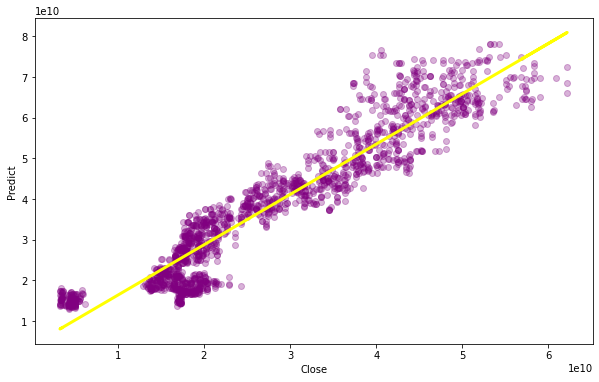

In [57]:
plt.figure(figsize=(10, 6))
plt.scatter(x, y, alpha=.3, color='purple')

plt.plot(x, model.predict(x), color='yellow', linewidth=3)

plt.xlabel('Close')
plt.ylabel('Predict')

plt.show()

In [58]:
model.predict(x[-1].reshape(-1, 1))

array([7.46252339e+10])

In [59]:
x[-1]

array([57047798521], dtype=int64)

In [60]:
y[-1]

72307860851.0

In [74]:
predicted = model.predict(np.array(data.value).reshape((-1, 1))[shifted:])

predicted = np.concatenate((predicted, np.array([0.0] * shifted)))

print(len(predicted))

data['predicted'] = predicted
data.head()

2111


,reportdate,value,predict,predicted
0,2013-12-30,3457625638,1.476927e+10,2.227160e+10
1,2013-12-31,3417092149,1.523359e+10,2.284657e+10
2,2014-01-01,3417092149,1.523359e+10,2.284657e+10
3,2014-01-02,3417092149,1.523359e+10,2.284657e+10
4,2014-01-03,3417092149,1.506514e+10,2.263798e+10


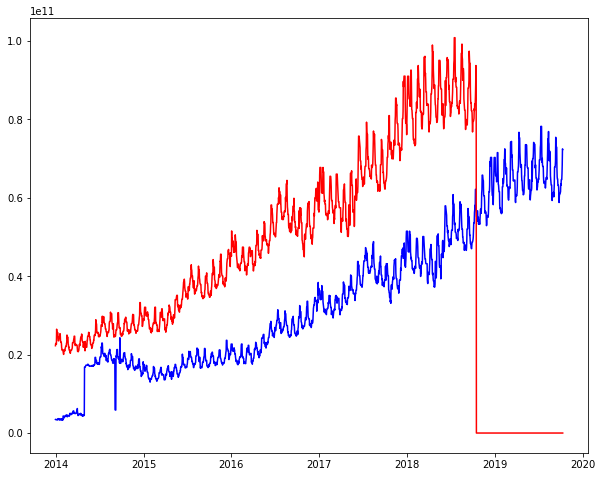

In [71]:
%matplotlib inline

plt.figure(figsize=(10, 8))

plt.plot(data.reportdate, data.value, color='b')

plt.plot(data.reportdate, data.predicted, color='r')

plt.show()

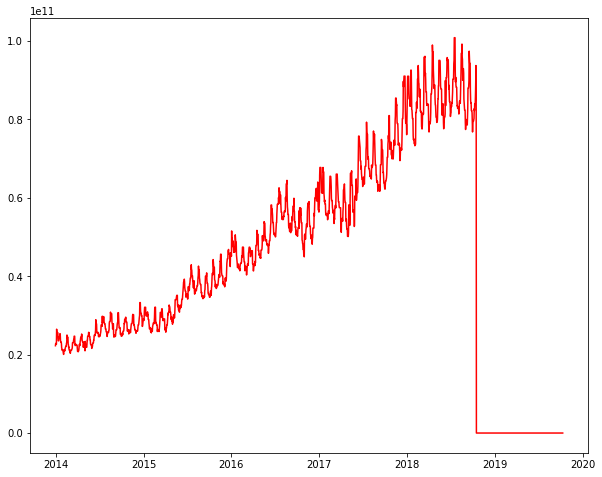

In [72]:
%matplotlib inline

plt.figure(figsize=(10, 8))

plt.plot(data.reportdate, data.predicted, color='r')

plt.show()